In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from datetime import datetime
from textblob import TextBlob  # Import TextBlob for sentiment analysis

In [5]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


First few lines of the chat data:
                 Date          Sender  \
0 2022-03-17 09:28:00  Aaaaaaaaaaaadi   
1 2022-03-17 09:28:00         Bansari   
2 2022-03-17 09:29:00         Bansari   
3 2022-03-17 09:29:00        Suryadip   
4 2022-03-17 09:29:00  Aaaaaaaaaaaadi   

                                             Message Sentiment Emojis  
0  Hey there , the great aditya siddhapura this s...  Positive   [🙌🏻]  
1                               Hey there sunlight ✨   Neutral    [✨]  
2                                  Ignoring ~aditya~   Neutral     []  
3                                       Hey there ❤️   Neutral   [❤️]  
4                                    <Media omitted>   Neutral     []  


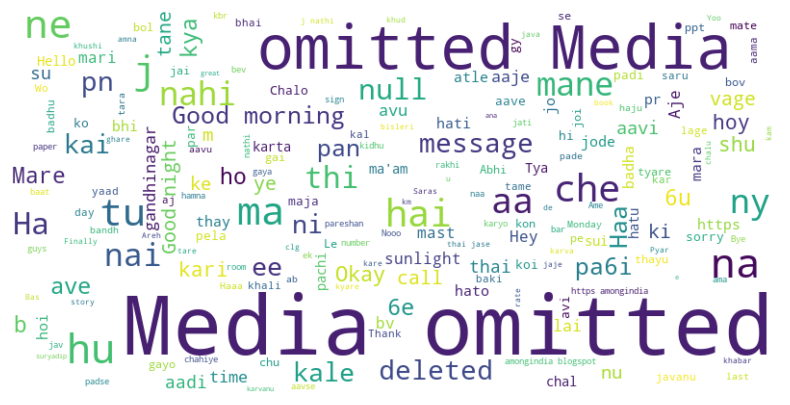

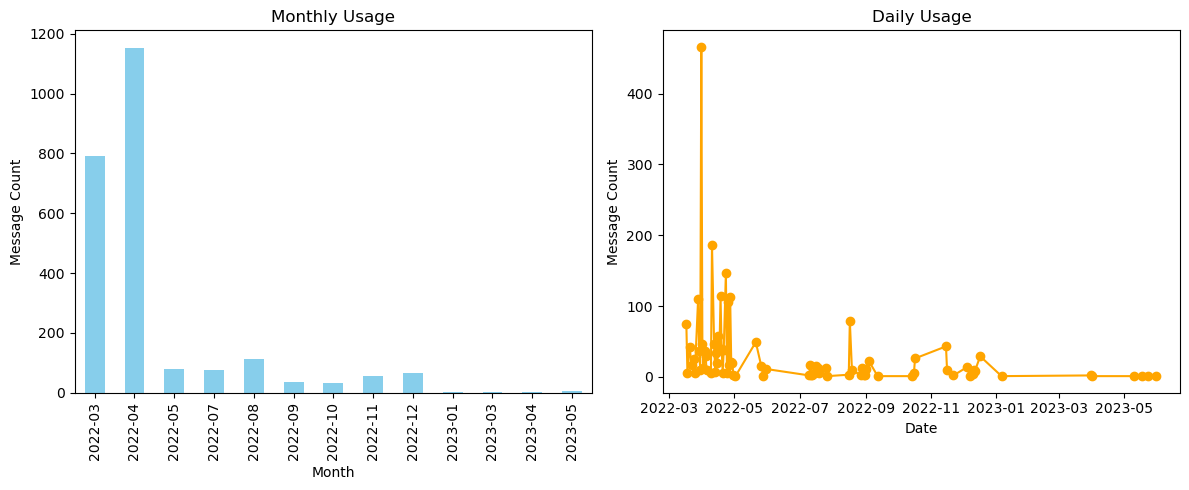

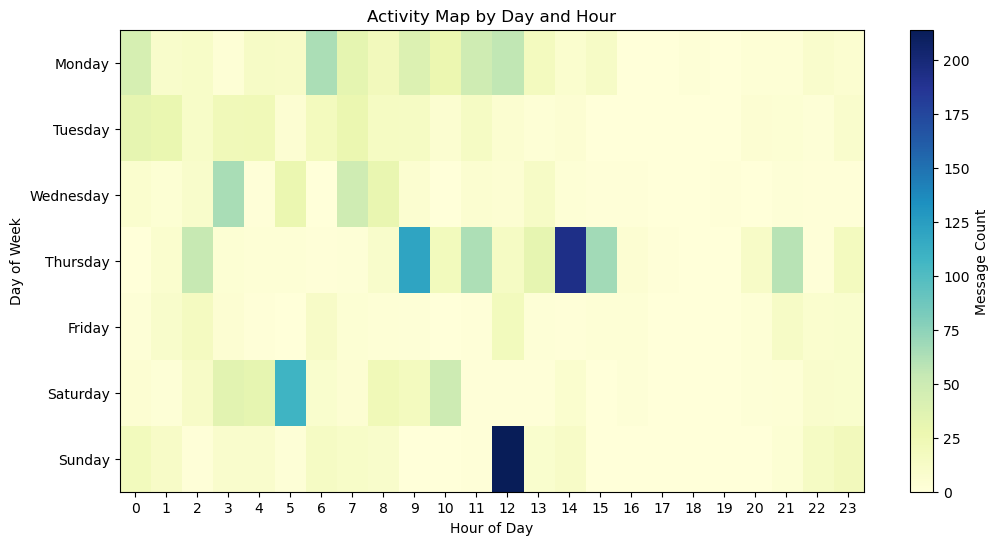


Participants based on message counts:
Bansari           946
Aaaaaaaaaaaadi    780
Suryadip          681
Name: Sender, dtype: int64


In [6]:
# Function to parse the WhatsApp chat data and return a DataFrame
def parse_chat_data(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        chat_lines = file.readlines()

    # Regex pattern to identify chat messages
    pattern = r"(\d{1,2}/\d{1,2}/\d{1,2}, \d{1,2}:\d{1,2}) - ([^:]+): (.+)"
    parsed_data = []

    for line in chat_lines:
        match = re.match(pattern, line)
        if match:
            date_str, sender, message = match.groups()
            date_time = datetime.strptime(date_str, "%m/%d/%y, %H:%M")
            parsed_data.append((date_time, sender.strip(), message.strip()))

    df = pd.DataFrame(parsed_data, columns=["Date", "Sender", "Message"])
    return df

# Function to generate word cloud from messages
def generate_word_cloud(df):
    text = " ".join(df["Message"].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color="white", random_state=42).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Function to generate monthly and daily usage charts
def generate_usage_charts(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.to_period("M")
    monthly_usage = df["Month"].value_counts().sort_index()
    daily_usage = df["Date"].dt.date.value_counts().sort_index()

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    monthly_usage.plot(kind="bar", color="skyblue")
    plt.xlabel("Month")
    plt.ylabel("Message Count")
    plt.title("Monthly Usage")

    plt.subplot(1, 2, 2)
    daily_usage.plot(kind="line", color="orange", marker="o")
    plt.xlabel("Date")
    plt.ylabel("Message Count")
    plt.title("Daily Usage")

    plt.tight_layout()
    plt.show()

# Function to generate activity map by day and hour
def generate_activity_map(df):
    df["Day"] = df["Date"].dt.day_name()
    df["Hour"] = df["Date"].dt.hour

    activity_map = df.groupby(["Day", "Hour"]).size().unstack(fill_value=0)
    days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    activity_map = activity_map.reindex(days_order, axis=0)

    plt.figure(figsize=(12, 6))
    plt.imshow(activity_map, cmap="YlGnBu", aspect="auto")
    plt.xticks(np.arange(24))
    plt.xlabel("Hour of Day")
    plt.yticks(np.arange(len(days_order)), days_order)
    plt.ylabel("Day of Week")
    plt.colorbar(label="Message Count")
    plt.title("Activity Map by Day and Hour")
    plt.show()

# Function for sentiment analysis
def analyze_sentiment(message):
    sentiment_score = TextBlob(message).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Function for emoji analysis
def extract_emojis(message):
    emojis = re.findall(r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+", message)
    return emojis

def main():
    file_path = r"C:\Users\gopij\Downloads\WhatsApp_Chat_Anyalyzer\sample_new.txt"
    data = parse_chat_data(file_path)

    # Perform sentiment analysis and emoji analysis
    data["Sentiment"] = data["Message"].apply(analyze_sentiment)
    data["Emojis"] = data["Message"].apply(extract_emojis)

    # Analyze chat data
    print("First few lines of the chat data:")
    print(data.head())

    generate_word_cloud(data)
    generate_usage_charts(data)
    generate_activity_map(data)

    # Show participants based on message counts
    participant_counts = data["Sender"].value_counts()
    print("\nParticipants based on message counts:")
    print(participant_counts)

if __name__ == "__main__":
    main()
